In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [7]:
df.isna()
print(df['AverageTemperature'].dtype)
print(df['AverageTemperatureUncertainty'].dtype)

float64
float64


In [8]:
df['AverageTemperature'] = df['AverageTemperature'].fillna(df['AverageTemperature'].mean())

In [9]:
df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].fillna(df['AverageTemperatureUncertainty'].mean())

In [10]:
df.isna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8599207,False,False,False,False,False,False,False
8599208,False,False,False,False,False,False,False
8599209,False,False,False,False,False,False,False
8599210,False,False,False,False,False,False,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


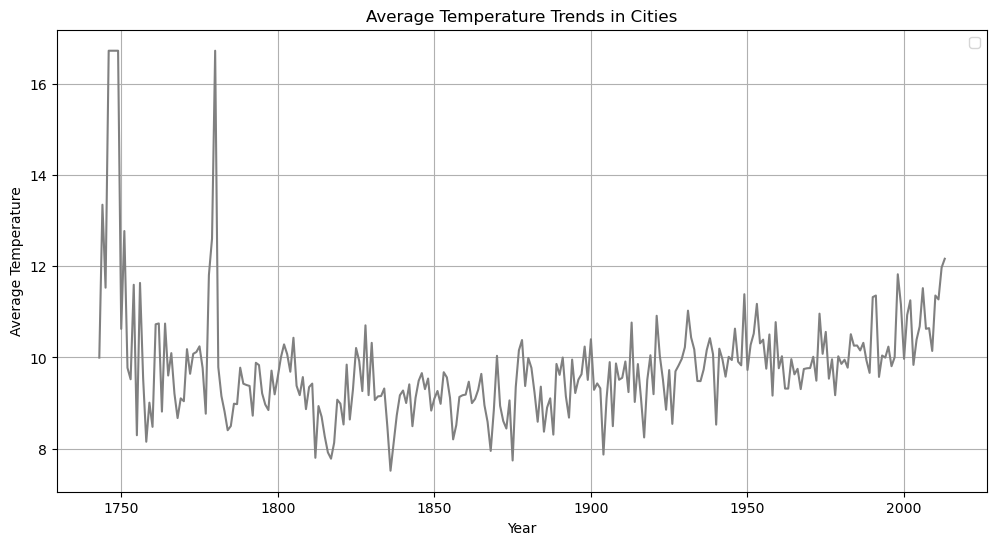

In [29]:
# # plt.plot(df['dt'],df['AverageTemperature'])

# # # plt.plot(df['M1'], df['PHY'],color='green')
# # # plt.xlabel('M1')
# # # plt.ylabel('PHY')
# # # plt.title('Line Plot')
# # # plt.show()

# city_data = df[df['City'] == 'New York'].copy()
# city_data['dt'] = pd.to_datetime(city_data['dt'],errors = 'coerce')
# city_data['Year'] = city_data['dt'].dt.year
# annual_avg_temp = city_data.groupby('Year')['Average']

df['dt'] = pd.to_datetime(df['dt'])

city_data=df[df['City']=='New York'].copy()
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],color='grey')

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Trends in Cities')
plt.legend()
plt.grid(True)
plt.show()

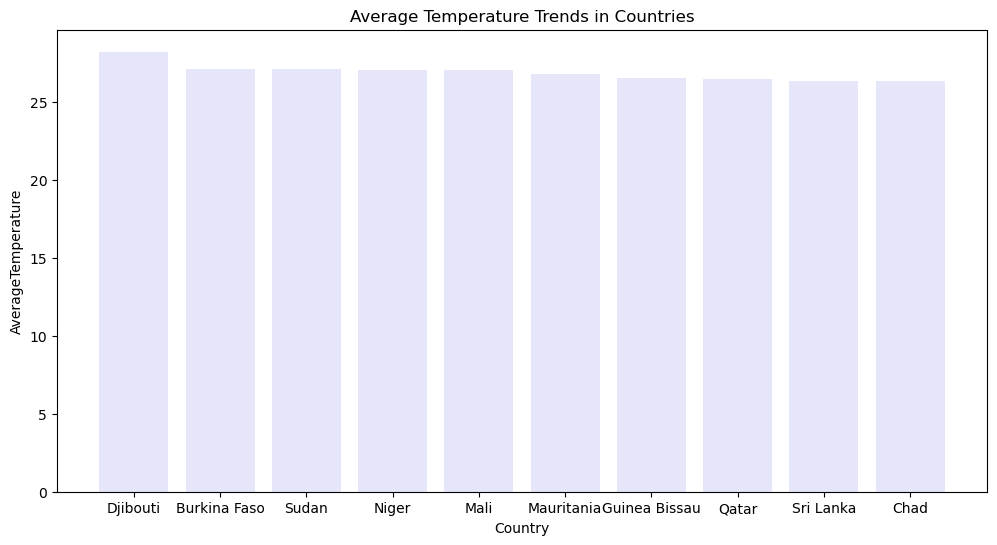

In [28]:
avg_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index().sort_values(by='AverageTemperature',ascending=False).head(10)
# avg_temp=df.groupby('Country')["AverageTemperature"].mean().reset_index().sort_values(by='AverageTemperature', ascending=False).head(10)
# avg_temp
plt.figure(figsize=(12,6))
plt.bar(avg_temp['Country'],avg_temp['AverageTemperature'],color='lavender')
plt.xlabel('Country')
plt.ylabel('AverageTemperature')
plt.title('Average Temperature Trends in Countries')
plt.show()

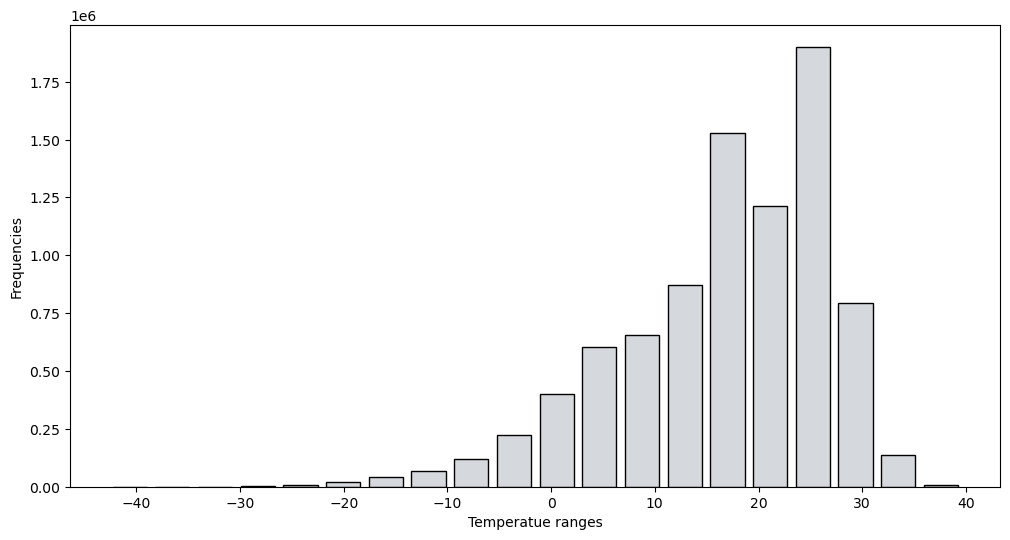

In [46]:
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.rcdefaults()
plt.hist(df['AverageTemperature'],bins=20,rwidth=0.8,edgecolor='Black',color='#d5d8dc')
plt.xlabel("Temperatue ranges")
plt.ylabel("Frequencies")
plt.show()

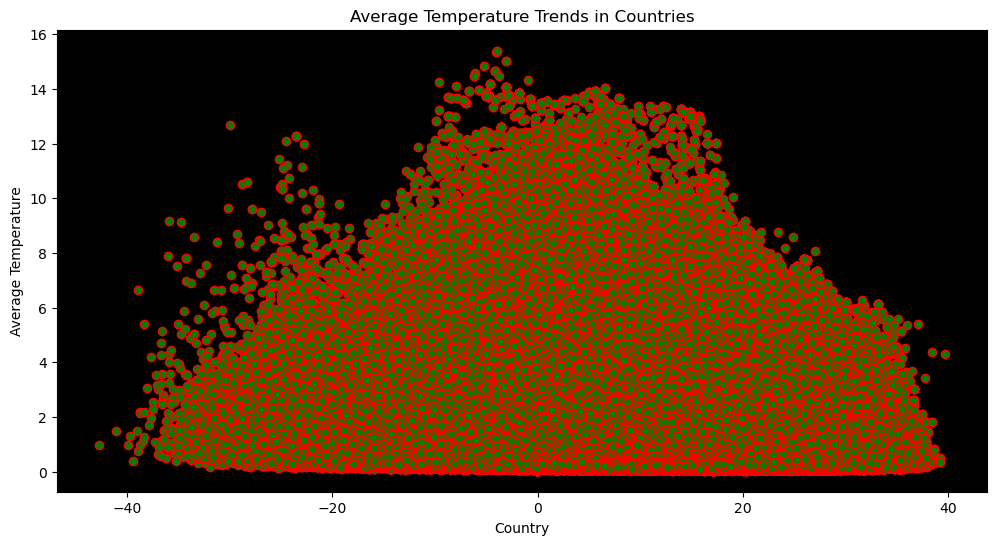

In [56]:
# plt.figure(figsize=(12,6))
# plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'],alpha=0.5,color='pink',edgecolor='black')
# plt.show()


fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'],color='green',edgecolor='red')

ax.set_facecolor('black')
ax.set_xlabel('Country')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature Trends in Countries')

plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_7476\4291059289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread['Years'] = spread['dt'].dt.year


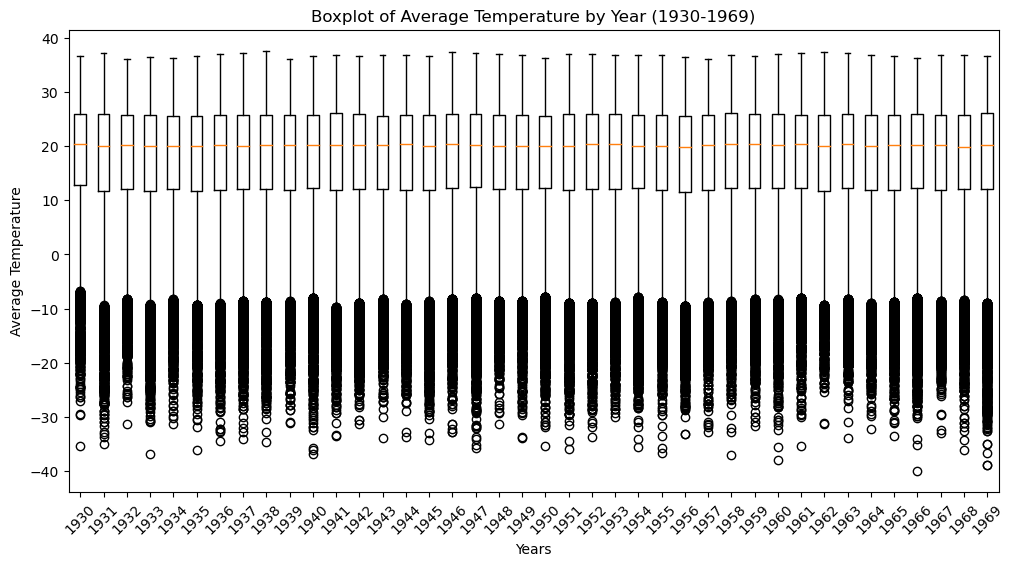

In [60]:
spread = df[(df['dt'] > '1930-01-01') & (df['dt'] < '1969-12-31')]

spread['Years'] = spread['dt'].dt.year

plt.figure(figsize=(12, 6))
plt.boxplot([spread['AverageTemperature'][spread['Years'] == year] for year in spread['Years'].unique()], 
            labels=spread['Years'].unique())

plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.title("Boxplot of Average Temperature by Year (1930-1969)")
plt.xticks(rotation=45) 
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27389ac8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x27389aca490>,
 'boxes': [<matplotlib.lines.Line2D at 0x27389ac8150>,
 'medians': [<matplotlib.lines.Line2D at 0x27389acbad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2738971ff10>,
 'means': []}

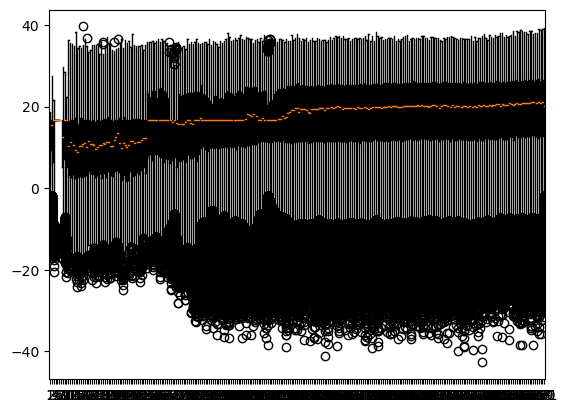

In [61]:
country_data = df.copy()
country_data['Year'] = country_data['dt'].dt.year
grouped_data  = [group['AverageTemperature'] for _, group in country_data.groupby('Year')]
plt.boxplot(grouped_data)

In [62]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [75]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


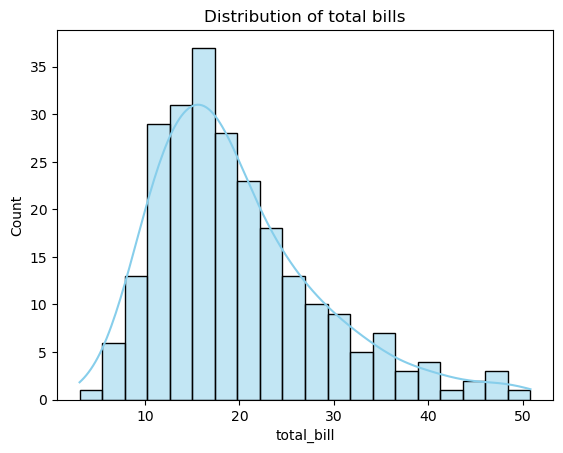

In [76]:
sns.histplot(data=tips, x="total_bill",kde=True,bins=20,color="skyblue")
plt.title("Distribution of total bills")
plt.show()

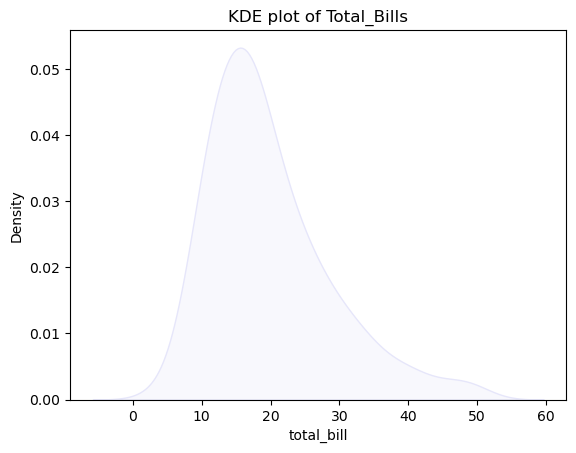

In [77]:
sns.kdeplot(data=tips,x="total_bill",color='lavender',fill=True)
plt.title('KDE plot of Total_Bills')
plt.show()

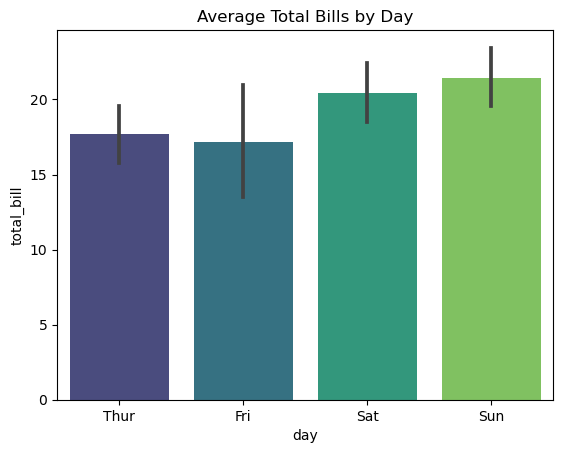

In [79]:
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Average Total Bills by Day")
plt.show()



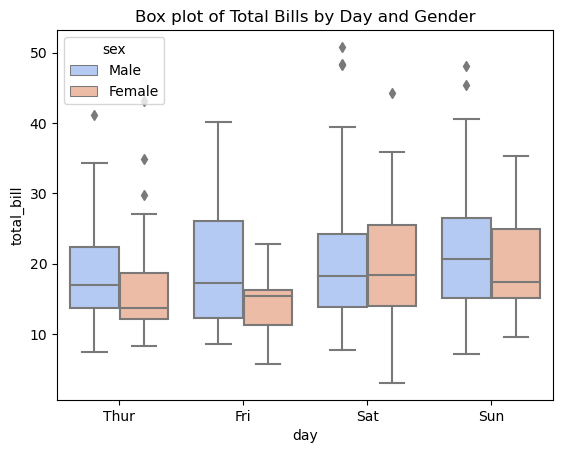

In [83]:
sns.boxplot(data=tips,x='day',y="total_bill",hue = "sex",palette="coolwarm")
plt.title("Box plot of Total Bills by Day and Gender")
plt.show()

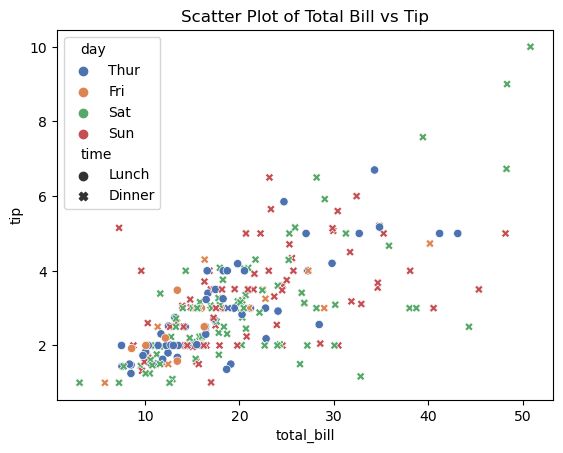

In [85]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

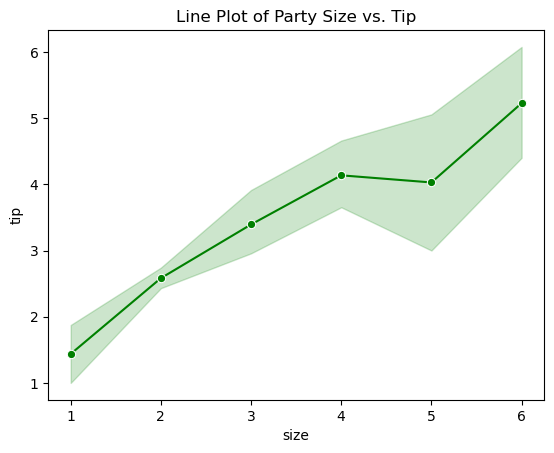

In [86]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="green")
plt.title("Line Plot of Party Size vs. Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


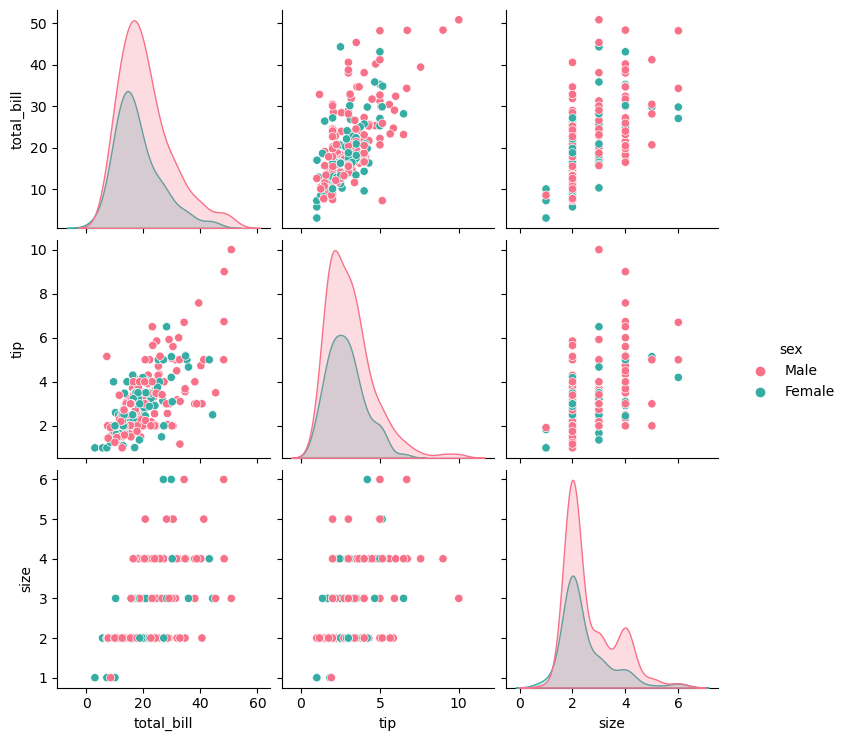

In [88]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

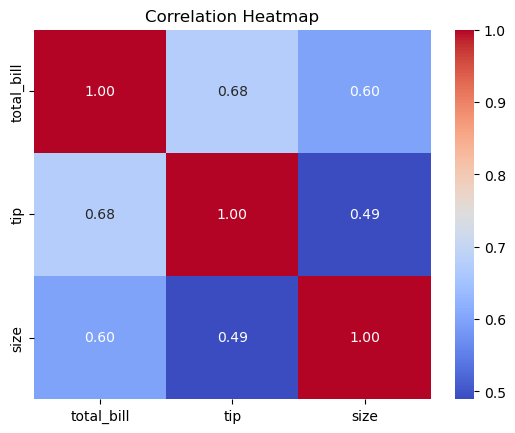

In [89]:
numeric_tips = tips.select_dtypes(include=['number'])
corr_matrix = numeric_tips.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()